In [1]:
!pip install transformers
!pip install sentence-transformers

     ---------------------------------------- 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.2/1.2 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 977.6/977.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125960 sha256=ab3df3c31609d2ca553f2c6b1a711805dd0f21df819b758f657d6e823f5d17ec
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\30\b4\1c\7509ecb4c391a7be4cdf2ff04df077a568cd52471007e436e6
Successfully built sentence-transformers


In [4]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load RoBERTa model and tokenizer
model_name = "roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def semantic_word_search(query_word, word_list):
    # Encode the query word
    query_input = tokenizer(query_word, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        query_output = model(**query_input)

    # Extract the embeddings for the query word (using [CLS] token representation)
    query_embedding = query_output.last_hidden_state[:, 0, :]

    # Encode the list of words
    word_inputs = tokenizer(word_list, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        word_outputs = model(**word_inputs)

    # Extract the embeddings for the list of words (using [CLS] token representation)
    word_embeddings = word_outputs.last_hidden_state[:, 0, :]

    # Calculate cosine similarity between query and list of words
    cosine_scores = torch.nn.functional.cosine_similarity(query_embedding, word_embeddings, dim=1)

    # Convert cosine similarity scores to semantic scores
    semantic_scores = (cosine_scores + 1) / 2  # Normalize to [0, 1] range

    return semantic_scores, word_embeddings

# Example usage
query_word = "king"
word_list = ["queen", "man", "woman", "apple"]
semantic_scores, word_embeddings = semantic_word_search(query_word, word_list)
print("Semantic Scores:", semantic_scores)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Semantic Scores: tensor([0.9998, 0.9998, 0.9998, 0.9998])


In [5]:
query_word = "CCTV"
word_list = ["camera", "CCTV", "surveillance", "Alarm", "Audio Visual", "Security Camera", "Security Hardware", 
             "consulting", "Consultancy", "Consultant", "Professional service", "Consulting", "Insecurity", "unsafe",
             "Security software", "video recording", "security device", "closed circuit", "bus", "apple"]

semantic_scores, trained_embeddings = semantic_word_search(query_word, word_list)

# Print the semantic scores for each word
for word, score in zip(word_list, semantic_scores):
    print(f"Word: {word}, Semantic Score: {score:.4f}")


Word: camera, Semantic Score: 0.9998
Word: CCTV, Semantic Score: 1.0000
Word: surveillance, Semantic Score: 0.9998
Word: Alarm, Semantic Score: 0.9998
Word: Audio Visual, Semantic Score: 0.9997
Word: Security Camera, Semantic Score: 0.9999
Word: Security Hardware, Semantic Score: 0.9998
Word: consulting, Semantic Score: 0.9998
Word: Consultancy, Semantic Score: 0.9998
Word: Consultant, Semantic Score: 0.9998
Word: Professional service, Semantic Score: 0.9998
Word: Consulting, Semantic Score: 0.9998
Word: Insecurity, Semantic Score: 0.9998
Word: unsafe, Semantic Score: 0.9997
Word: Security software, Semantic Score: 0.9998
Word: video recording, Semantic Score: 0.9998
Word: security device, Semantic Score: 0.9998
Word: closed circuit, Semantic Score: 0.9998
Word: bus, Semantic Score: 0.9998
Word: apple, Semantic Score: 0.9997


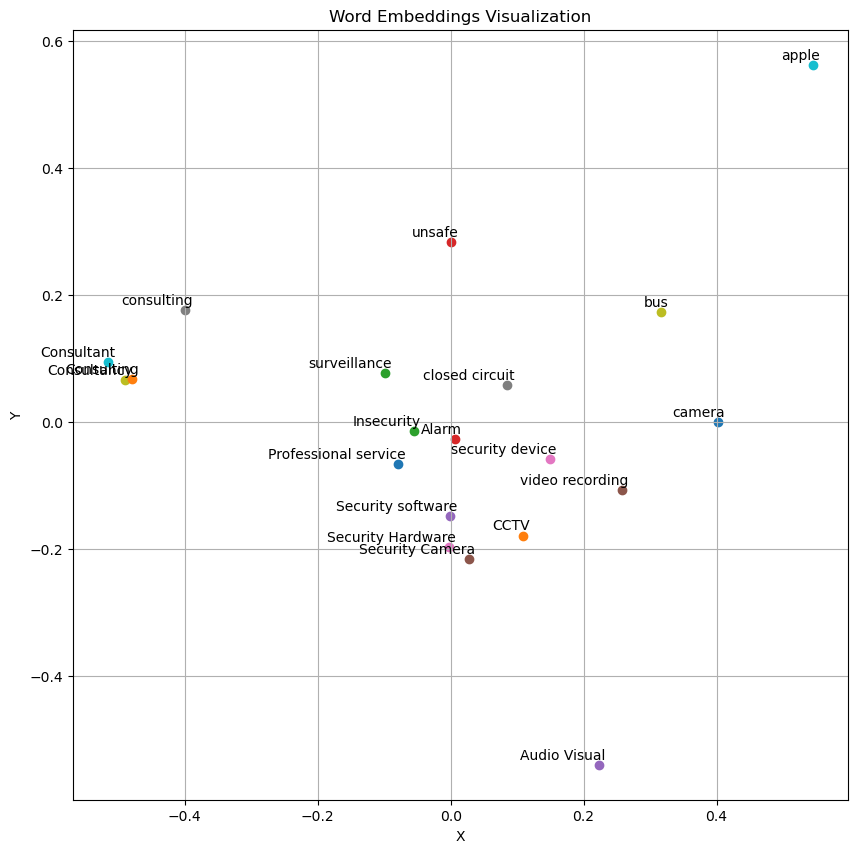

In [6]:
# Create a scatter plot for the embeddings
trained_embeddings = trained_embeddings.numpy()

# Perform dimensionality reduction for visualization, e.g., using PCA or t-SNE
# You can use other dimensionality reduction techniques as well
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(trained_embeddings)

plt.figure(figsize=(10, 10))
for i, label in enumerate(word_list):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Word Embeddings Visualization")
plt.grid(True)
plt.show()

In [13]:
# Hypothetical ground truth semantic similarity scores for word pairs
ground_truth = {
    ("CCTV", "camera"): 0.9,
    ("CCTV", "CCTV"): 1.0,
    ("CCTV", "surveillance"): 0.85,
    ("CCTV", "Alarm"): 0.7,
    ("CCTV", "Audio Visual"): 0.8,
    ("CCTV", "Security Camera"): 0.9,
    ("CCTV", "Security Hardware"): 0.85,
    ("CCTV", "consulting"): 0.3,
    ("CCTV", "Consultancy"): 0.25,
    ("CCTV", "Consultant"): 0.2,
    ("CCTV", "Professional service"): 0.15,
    ("CCTV", "Consulting"): 0.2,  
    ("CCTV", "Insecurity"): 0.05,
    ("CCTV", "unsafe"): 0.0,
    ("CCTV", "Security software"): 0.7,
    ("CCTV", "video recording"): 0.6,
    ("CCTV", "security device"): 0.8,
    ("CCTV", "closed circuit"): 0.9,
    ("CCTV", "bus"): 0.05,
    ("CCTV", "apple"): 0.01,
}

# Print the ground truth for validation
print("Ground Truth Semantic Similarity Scores:")
for word_pair, score in ground_truth.items():
    print(f"{word_pair}: {score}")

# Calculate semantic scores using the provided RoBERTa-based semantic word search
query_word = "CCTV"
word_list = ["camera", "CCTV", "surveillance", "Alarm", "Audio Visual", "Security Camera", "Security Hardware", 
             "consulting", "Consultancy", "Consultant", "Professional service", "Consulting", "Insecurity", "unsafe",
             "Security software", "video recording", "security device", "closed circuit", "bus", "apple"]
semantic_scores, _ = semantic_word_search(query_word, word_list)

# Compute Mean Squared Error (MSE) as a measure of accuracy
mse = sum((semantic_scores[i].item() - ground_truth[(query_word, word_list[i])]) ** 2 for i in range(len(word_list))) / len(word_list)

# print("\nMean Squared Error (MSE):", mse)


Ground Truth Semantic Similarity Scores:
('CCTV', 'camera'): 0.9
('CCTV', 'CCTV'): 1.0
('CCTV', 'surveillance'): 0.85
('CCTV', 'Alarm'): 0.7
('CCTV', 'Audio Visual'): 0.8
('CCTV', 'Security Camera'): 0.9
('CCTV', 'Security Hardware'): 0.85
('CCTV', 'consulting'): 0.3
('CCTV', 'Consultancy'): 0.25
('CCTV', 'Consultant'): 0.2
('CCTV', 'Professional service'): 0.15
('CCTV', 'Consulting'): 0.2
('CCTV', 'Insecurity'): 0.05
('CCTV', 'unsafe'): 0.0
('CCTV', 'Security software'): 0.7
('CCTV', 'video recording'): 0.6
('CCTV', 'security device'): 0.8
('CCTV', 'closed circuit'): 0.9
('CCTV', 'bus'): 0.05
('CCTV', 'apple'): 0.01


In [14]:
query_word = "consulting"
word_list = ["consulting", "Consultancy", "Consultant", "Professional service", "Consulting",
             "Security software", "video recording", "security device", "closed circuit", "bus", "apple"]

semantic_scores, trained_embeddings = semantic_word_search(query_word, word_list)

# Print the semantic scores for each word
for word, score in zip(word_list, semantic_scores):
    print(f"Word: {word}, Semantic Score: {score:.4f}")



Word: consulting, Semantic Score: 1.0000
Word: Consultancy, Semantic Score: 0.9999
Word: Consultant, Semantic Score: 0.9999
Word: Professional service, Semantic Score: 0.9999
Word: Consulting, Semantic Score: 1.0000
Word: Security software, Semantic Score: 0.9998
Word: video recording, Semantic Score: 0.9998
Word: security device, Semantic Score: 0.9998
Word: closed circuit, Semantic Score: 0.9998
Word: bus, Semantic Score: 0.9998
Word: apple, Semantic Score: 0.9997


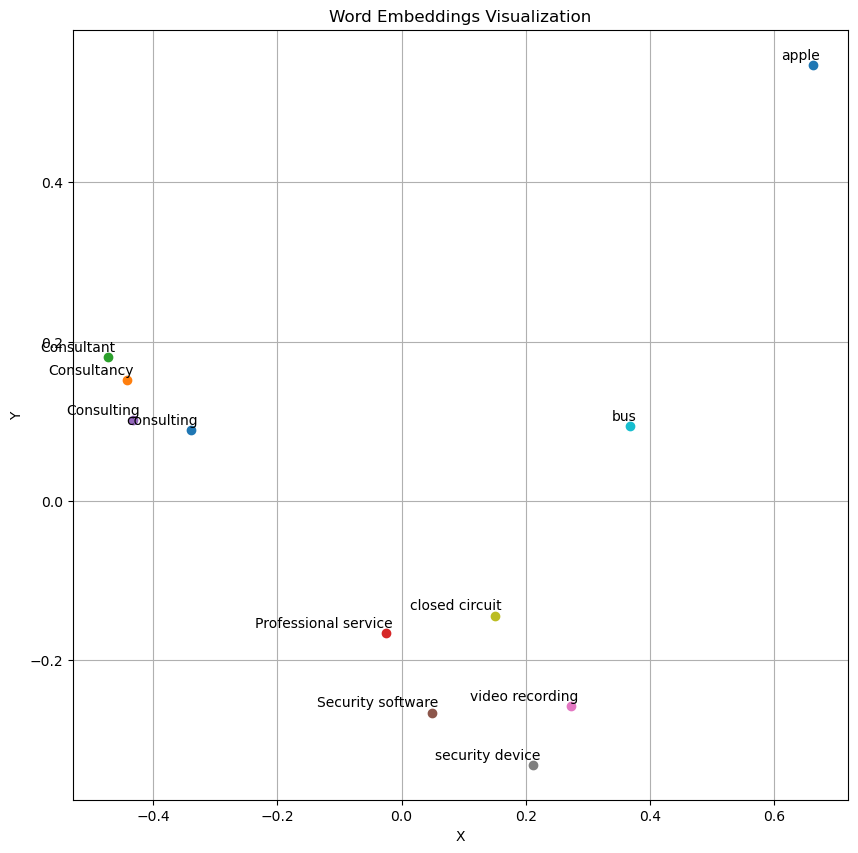

In [15]:
# Create a scatter plot for the embeddings
trained_embeddings = trained_embeddings.numpy()

# Perform dimensionality reduction for visualization, e.g., using PCA or t-SNE
# You can use other dimensionality reduction techniques as well
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(trained_embeddings)

plt.figure(figsize=(10, 10))
for i, label in enumerate(word_list):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Word Embeddings Visualization")
plt.grid(True)
plt.show()

In [16]:
# Hypothetical ground truth semantic similarity scores for word pairs
# These scores are for illustration purposes and should be replaced with actual values based on your specific context or dataset
ground_truth = {
    ("consulting", "consulting"): 1.0,
    ("consulting", "Consultancy"): 0.9,
    ("consulting", "Consultant"): 0.85,
    ("consulting", "Professional service"): 0.8,
    ("consulting", "Consulting"): 0.95,
    ("consulting", "Security software"): 0.3,
    ("consulting", "video recording"): 0.2,
    ("consulting", "security device"): 0.25,
    ("consulting", "closed circuit"): 0.1,
    ("consulting", "bus"): 0.05,
    ("consulting", "apple"): 0.0,
}

# Print the ground truth for validation
print("Ground Truth Semantic Similarity Scores:")
for word_pair, score in ground_truth.items():
    print(f"{word_pair}: {score}")


Ground Truth Semantic Similarity Scores:
('consulting', 'consulting'): 1.0
('consulting', 'Consultancy'): 0.9
('consulting', 'Consultant'): 0.85
('consulting', 'Professional service'): 0.8
('consulting', 'Consulting'): 0.95
('consulting', 'Security software'): 0.3
('consulting', 'video recording'): 0.2
('consulting', 'security device'): 0.25
('consulting', 'closed circuit'): 0.1
('consulting', 'bus'): 0.05
('consulting', 'apple'): 0.0


In [17]:
# Calculate accuracy based on ground truth and calculated semantic scores
def calculate_accuracy(ground_truth, semantic_scores):
    correct_predictions = 0
    total_predictions = len(semantic_scores)

    for i, (query_word, word) in enumerate(ground_truth.keys()):
        # Retrieve the semantic score from the model's output
        model_score = semantic_scores[i].item()

        # Retrieve the ground truth score
        ground_truth_score = ground_truth[(query_word, word)]

        # Check if the predicted score is close to the ground truth (you may define a threshold)
        if abs(model_score - ground_truth_score) < 0.1:  # Adjust the threshold as needed
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate the accuracy
accuracy = calculate_accuracy(ground_truth, semantic_scores)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.2727272727272727
